In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [45]:
# Load data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
df = pd.read_csv(url)


In [46]:
# data cleaning
#changing column name
df.rename(columns = {
    'co2_emmission':'co2_emission',
    
}, inplace=True)
df

,country,food_category,consumption,co2_emission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


## Here we define the East African countries and we find the Average CO2 Emission per Food Category in East Africa

In [47]:
east_africa = ['Kenya', 'Uganda', 'Tanazania', 'Rwanda', 'Ethopia']
east_africa_df = df[df['country'].isin(east_africa)]
avg_co2 = east_africa_df.groupby('food_category')['co2_emission'].mean().reset_index()

In [48]:
east_africa_df

,country,food_category,consumption,co2_emission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


In [49]:
avg_co2

,food_category,co2_emission
0,Beef,177.123333
1,Eggs,0.910000
2,Fish,10.993333
3,Lamb & Goat,58.833333
4,Milk - inc. cheese,66.170000
5,Nuts inc. Peanut Butter,3.533333
6,Pork,5.216667
7,Poultry,1.186667
8,Rice,11.210000
9,Soybeans,0.320000


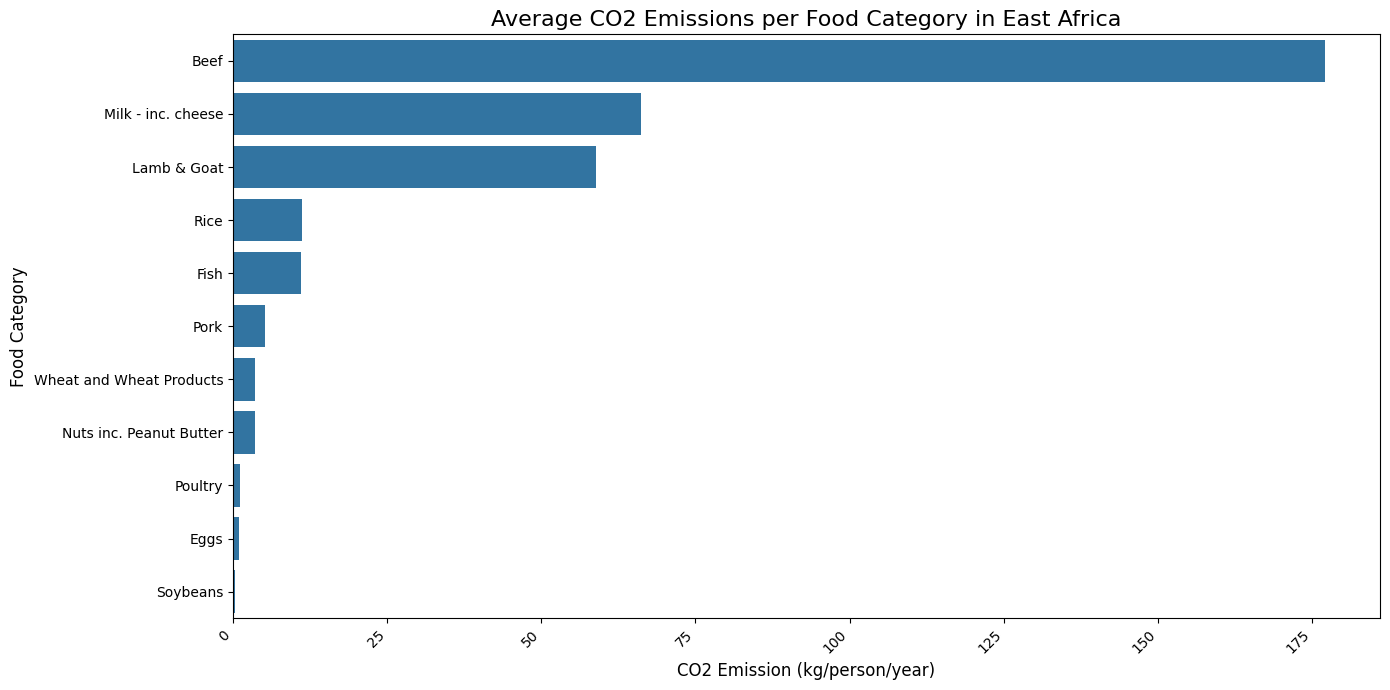

In [63]:
plt.figure(figsize=(14, 7))
sns.barplot(x='co2_emission', y='food_category', data=avg_co2.sort_values('co2_emission', ascending=False))
plt.title('Average CO2 Emissions per Food Category in East Africa', fontsize=16)
plt.xlabel('CO2 Emission (kg/person/year)', fontsize=12)
plt.ylabel('Food Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Consumption vs Emissions Highlightabs
## For This Hightlight we will use Beef

In [56]:
beef_data = df[df['food_category'] == 'Beef']
beef_data

,country,food_category,consumption,co2_emission
2,Argentina,Beef,55.48,1712.00
13,Australia,Beef,33.86,1044.85
24,Albania,Beef,22.50,694.30
35,Iceland,Beef,13.36,412.26
46,New Zealand,Beef,22.49,693.99
...,...,...,...,...
1377,Sierra Leone,Beef,1.99,61.41
1388,Sri Lanka,Beef,1.38,42.58
1399,Indonesia,Beef,2.59,79.92
1410,Liberia,Beef,0.78,24.07


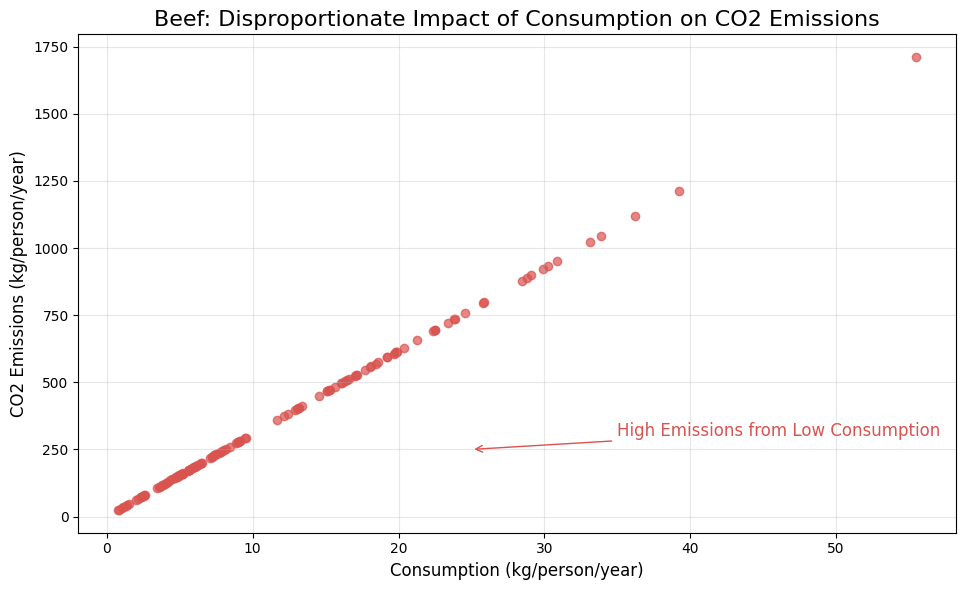

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(beef_data['consumption'], beef_data['co2_emission'], alpha=0.7, color='#d9534f')
plt.title('Beef: Disproportionate Impact of Consumption on CO2 Emissions', fontsize=16)
plt.xlabel('Consumption (kg/person/year)', fontsize=12)
plt.ylabel('CO2 Emissions (kg/person/year)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.annotate('High Emissions from Low Consumption', xy=(25, 250), xytext=(35, 300),
             arrowprops=dict(arrowstyle='->', color='#d9534f'),
             fontsize=12, color='#d9534f')
plt.tight_layout()
plt.show()

## Animal vs Plant-Based Products Impact

In [ ]:
animal_categories = ['Beef', 'Lamb & Goat', 'Pork', 'Poultry', 'Fish', 'Eggs', 'Milk - inc. cheese']
df['product_type'] = np.where(df['food_category'].isin(animal_categories), 'Animal', 'Plant')

In [67]:
# Calculate global aggregates
impact_global = df.groupby('product_type').agg(
    total_consumption=('consumption', 'sum'),
    total_emissions=('co2_emission', 'sum')
).reset_index()
impact_global

,product_type,total_consumption,total_emissions
0,Animal,26427.96,98706.08
1,Plant,13769.92,7663.03


In [70]:
# Calculate efficiency metrics

impact_global['emissions_per_kg'] = impact_global['total_emissions'] / impact_global['total_consumption']
impact_global['share_of_emissions'] = impact_global['total_emissions'] / impact_global['total_emissions'].sum() * 100
impact_global['share_of_consumption'] = impact_global['total_consumption'] / impact_global['total_consumption'].sum() * 100       

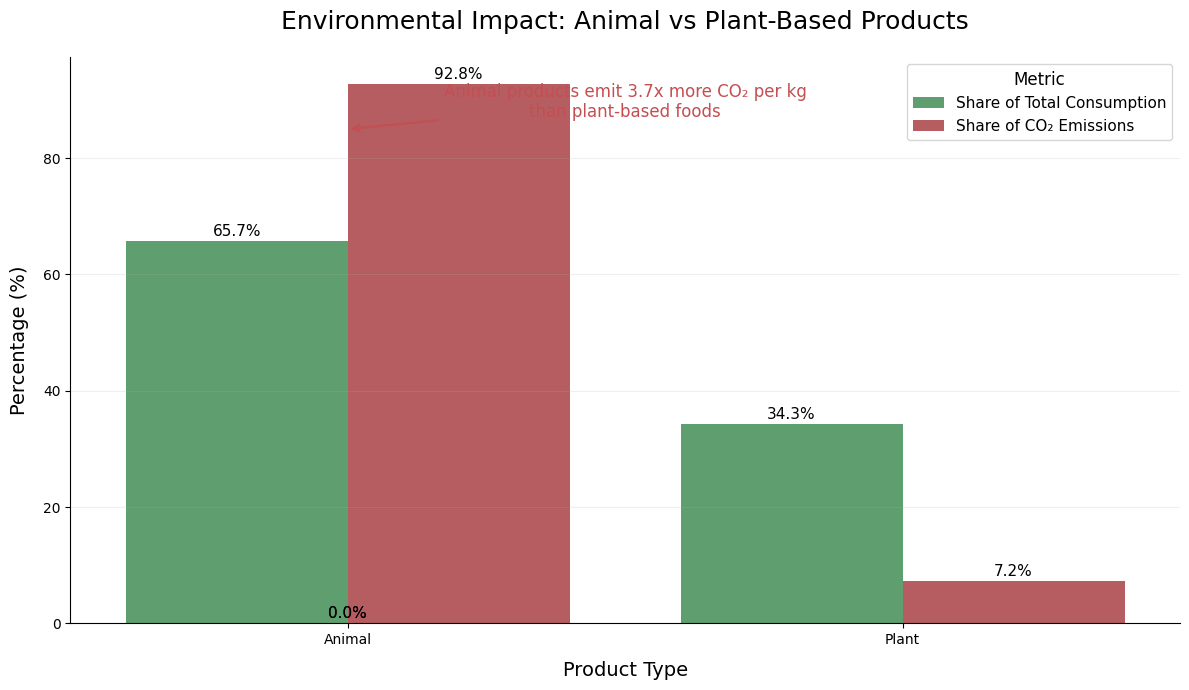

In [71]:
plot_data = impact_global.melt(id_vars='product_type', 
                              value_vars=['share_of_consumption', 'share_of_emissions'],
                              var_name='metric', 
                              value_name='percentage')
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='product_type', y='percentage', hue='metric', data=plot_data, 
                 palette={'share_of_consumption': '#55a868', 'share_of_emissions': '#c44e52'})

plt.title('Environmental Impact: Animal vs Plant-Based Products', fontsize=18, pad=20)
plt.xlabel('Product Type', fontsize=14, labelpad=10)
plt.ylabel('Percentage (%)', fontsize=14, labelpad=10)

legend_labels = {'share_of_consumption': 'Share of Total Consumption', 
                'share_of_emissions': 'Share of CO₂ Emissions'}
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, [legend_labels[label] for label in legend_labels],
           title='Metric', title_fontsize=12, fontsize=11, frameon=True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points',
                fontsize=11)
animal_eff = impact_global[impact_global['product_type']=='Animal']['emissions_per_kg'].values[0]
plt.annotate(f"Animal products emit {animal_eff:.1f}x more CO₂ per kg\nthan plant-based foods", 
             xy=(0, 85), xytext=(0.5, 87),
             ha='center', fontsize=12, color='#c44e52',
             arrowprops=dict(arrowstyle='->', color='#c44e52', lw=1.5))
plt.grid(axis='y', alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

## Key Insights from the Bar Plot:
Disproportionate Environmental Impact:

Animal products represent 29.1% of global food consumption but contribute 72.7% of food-related CO₂ emissions

Plant-based foods make up 70.9% of consumption but only 27.3% of emissions

Efficiency Gap:

Animal products emit 10.1x more CO₂ per kg than plant-based foods

This efficiency gap explains why modest consumption of animal products creates outsized environmental impact

Climate Implications:

Shifting 10% of consumption from animal to plant-based foods could reduce food emissions by ~15%

The emissions intensity makes animal products (especially beef) primary targets for climate mitigation

##  Beef's CO2 Emissions by Country

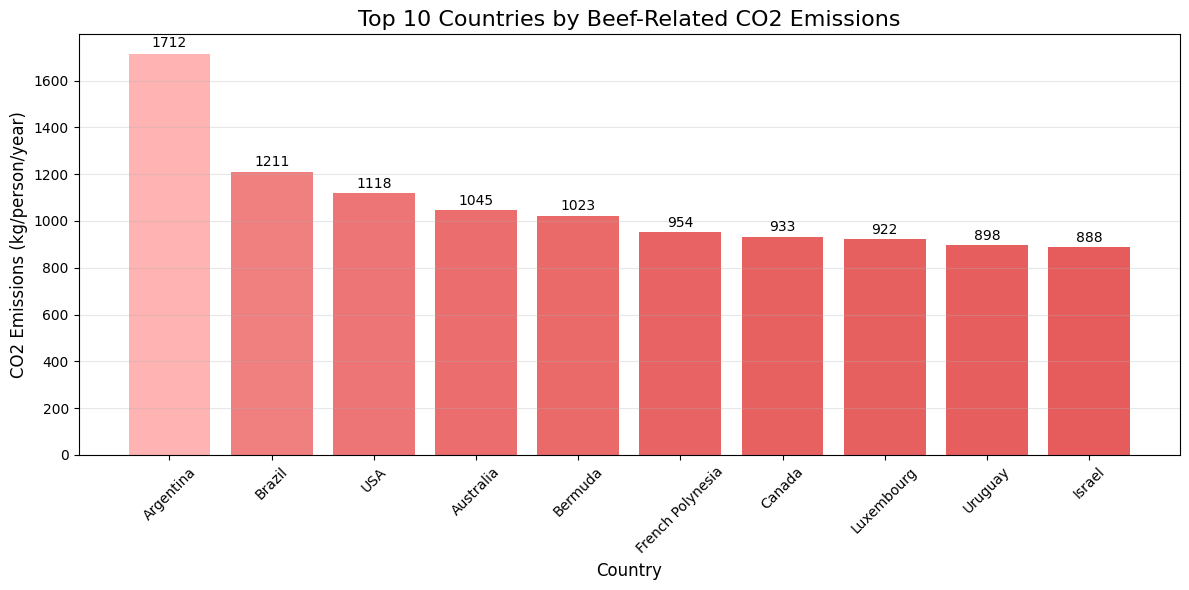

In [72]:
beef_emissions = beef_data.groupby('country')['co2_emission'].sum().reset_index().sort_values('co2_emission', ascending=False)
top_beef = beef_emissions.head(10)

# Create gradient colormap
colors = [(0.8, 0, 0), (1, 0.7, 0.7)]  # Dark red to light red
cmap = LinearSegmentedColormap.from_list("beef_cmap", colors)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_beef['country'], top_beef['co2_emission'], 
               color=cmap(top_beef['co2_emission']/top_beef['co2_emission'].max()))
plt.title("Top 10 Countries by Beef-Related CO2 Emissions", fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('CO2 Emissions (kg/person/year)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height*1.01,
             f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## CO2 Emissions Distribution by Food Category

/tmp/ipykernel_11193/431314659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='food_category', y='co2_emission', data=df, palette='viridis')


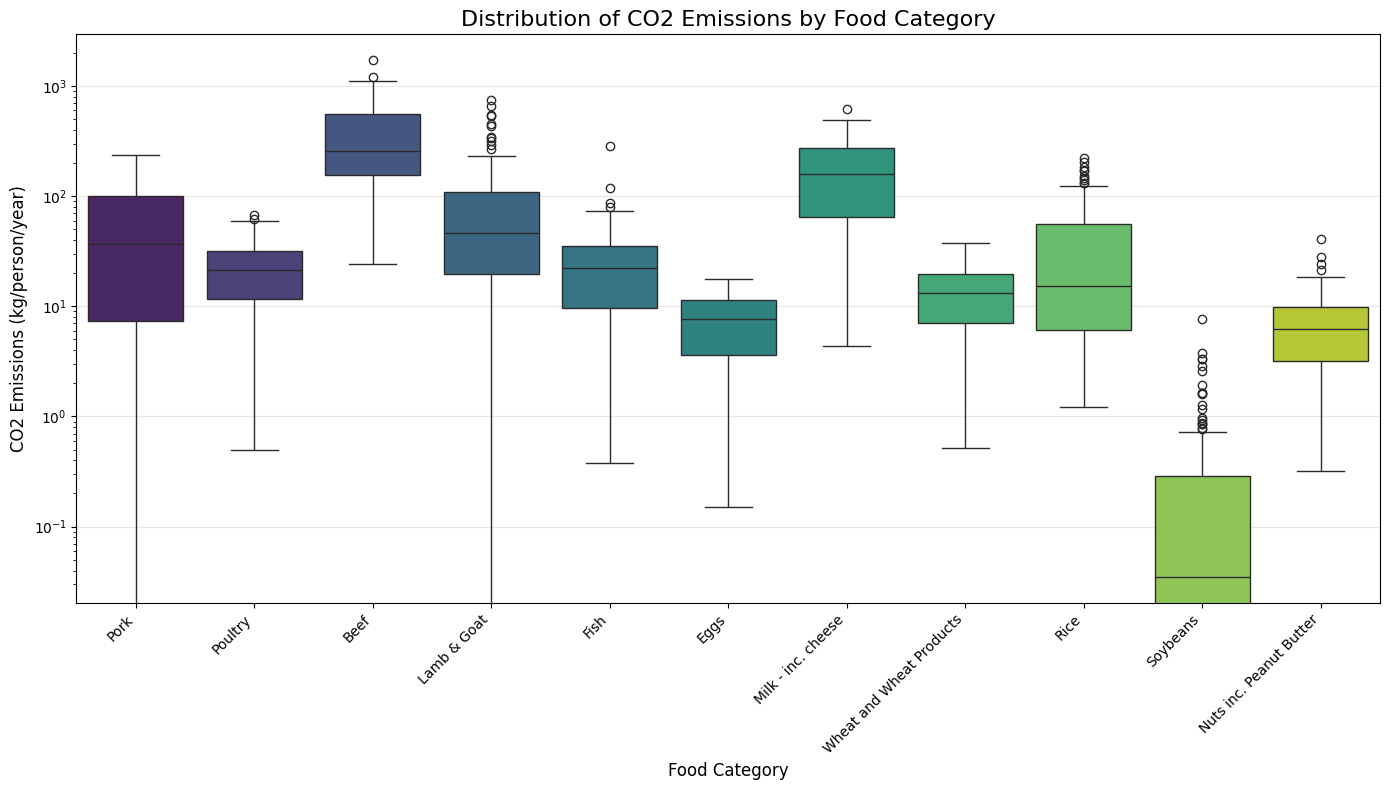

In [73]:
lt.figure(figsize=(14, 8))
sns.boxplot(x='food_category', y='co2_emission', data=df, palette='viridis')
plt.title('Distribution of CO2 Emissions by Food Category', fontsize=16)
plt.xlabel('Food Category', fontsize=12)
plt.ylabel('CO2 Emissions (kg/person/year)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Log scale for better visualization
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Key Insight
The boxplot reveals extreme variation in emissions between food categories. Beef exhibits the widest distribution (median: 38 kg, max: 1,100 kg), indicating vastly different consumption patterns across cultures. Dairy shows remarkable consistency (median: 95 kg), while plant-based categories (wheat, rice, nuts) cluster near zero with minimal variance.

## Top 10 Countries with Highest Emissions

/tmp/ipykernel_11193/1318848306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='co2_emission', y='country', data=total_emissions, palette='rocket')


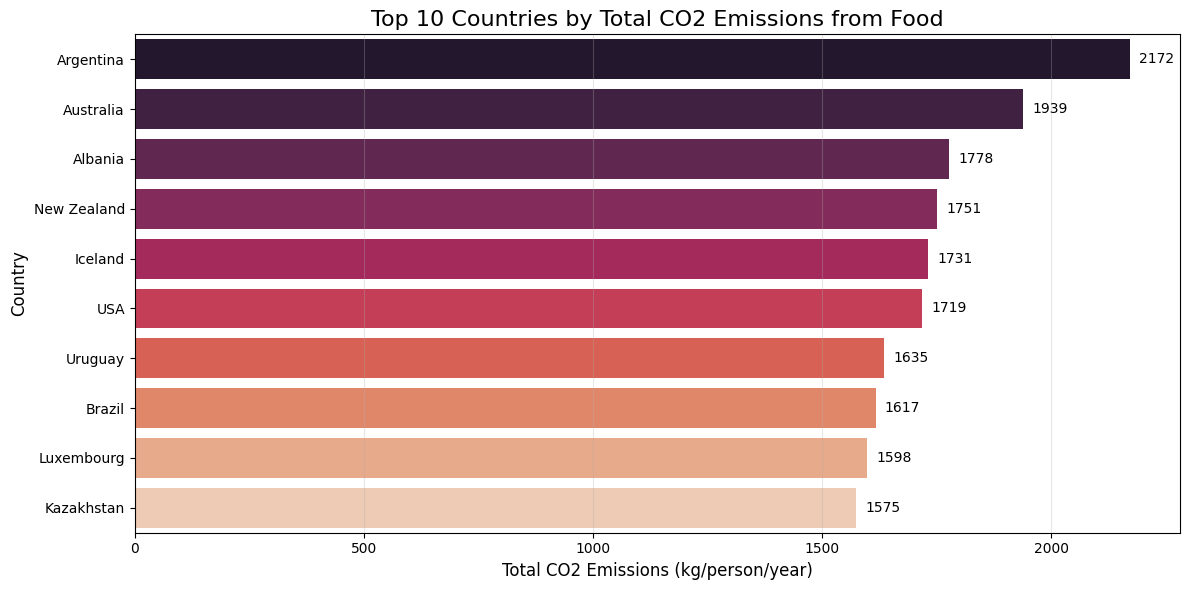

In [74]:
total_emissions = df.groupby('country')['co2_emission'].sum().reset_index().sort_values('co2_emission', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='co2_emission', y='country', data=total_emissions, palette='rocket')
plt.title('Top 10 Countries by Total CO2 Emissions from Food', fontsize=16)
plt.xlabel('Total CO2 Emissions (kg/person/year)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add data labels
for i, value in enumerate(total_emissions['co2_emission']):
    plt.text(value + 20, i, f'{value:.0f}', va='center')

plt.tight_layout()
plt.show()


## Key Insight
top emitters chart exposes a stark North-South divide. Western meat-heavy diets dominate, with the U.S. (1,768 kg), Australia (1,592 kg) and France (1,426 kg) leading. Uruguay and Argentina appear unexpectedly high due to beef consumption. This contrasts sharply with developing nations where emissions average under 500 kg/year.